<a href="https://colab.research.google.com/github/yasirumakavita/ML-SESSION-DOCS/blob/main/ML_SESSION_CLASSIFICATION_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML SESSION 3 - NOTEBOOK
CLASSIFICATION


##Importing Libraries

In [1]:
# Dataframe management 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# 1. Loading Data

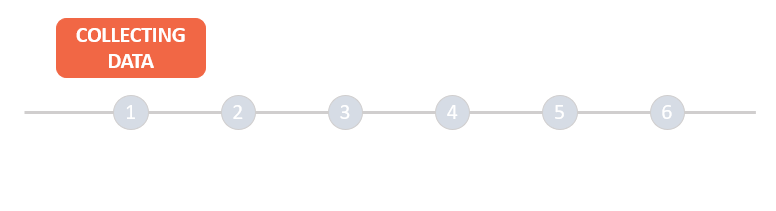

In [2]:
#file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data' #Original dataset

file_name = 'https://raw.githubusercontent.com/yasirumakavita/ML-SESSION-DOCS/main/zoo_edited.csv' #Missing values added

# Load CSV File
data = pd.read_csv(file_name, header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0.0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0.0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0.0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0.0,4,1,0,1,1


In [3]:
#Assigning column names

colum_headers = ['animal name', 'hair',	'feathers', 'eggs',	'milk',	'airborne',	'aquatic','predator',	'toothed'	,'backbone',	
                  'breathes',	'venomous',	'fins',	'legs',	'tail',	'domestic', 'catsize', 'animal_type']

data.columns = colum_headers

data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0.0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0.0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0.0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0.0,4,1,0,1,1


#2. Data Preparation

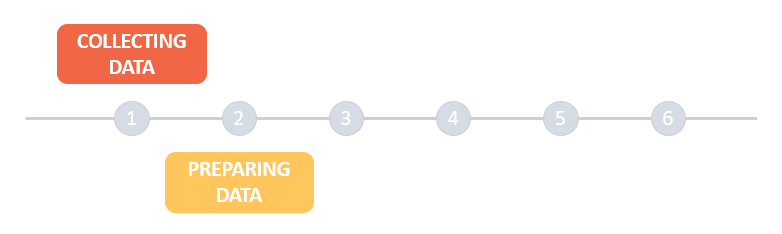

##2.0 - Exploring Data

In [4]:
#How many records are there ?

data.shape      #Returns number of rows, columns

(101, 18)

In [5]:
#What are the data types present

data.dtypes

animal name     object
hair             int64
feathers         int64
eggs             int64
milk             int64
airborne         int64
aquatic          int64
predator         int64
toothed          int64
backbone         int64
breathes         int64
venomous         int64
fins           float64
legs             int64
tail             int64
domestic         int64
catsize          int64
animal_type      int64
dtype: object

##2.1 - Treating missing values

In [6]:
Null = pd.isnull(data) #Checking if there are Null ("NaN" , "None") values in the dataframe
Null.value_counts() #Checking how many missing values are there (Displayed as 'True')

animal name  hair   feathers  eggs   milk   airborne  aquatic  predator  toothed  backbone  breathes  venomous  fins   legs   tail   domestic  catsize  animal_type
False        False  False     False  False  False     False    False     False    False     False     False     False  False  False  False     False    False          99
True         False  False     False  False  False     False    False     False    False     False     False     False  False  False  False     False    False           1
False        False  False     False  False  False     False    False     False    False     False     False     True   False  False  False     False    False           1
dtype: int64

In [7]:
#Extracting the index values of the rows with missing values

Missing_Rows = [index for index, row in data.iterrows() if row.isnull().any()]
Missing_Rows 

[58, 61]

In [8]:
#Observe the missing data points
data.loc[[61]] # data.loc function is used to access rows using index values

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
61,piranha,0,0,1,0,0,1,1,1,1,0,0,NaN,0,1,0,0,4


In [9]:
data.at[(61),'fins']=1  #Fill the missing value since it is obvious that 'piranha fish' has fins
data.loc[[61]]          #Check if it was successfully filled

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
61,piranha,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4


In [10]:
#Observe the next missing data points
data.loc[[58]]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
58,NaN,0,1,1,0,0,1,1,0,1,1,0,0.0,2,1,0,1,2


In [11]:
#Dropping the rows with missing values
data.drop(index=58, inplace=True)

##2.0 - Exploring data

In [12]:
#What are the unique values available?

data['animal_type'].unique() 

array([1, 4, 2, 7, 6, 5, 3])

In [13]:
#How many data points are there under each unique? (frequency)

data['animal_type'].value_counts() 

1    41
2    19
4    13
7    10
6     8
3     5
5     4
Name: animal_type, dtype: int64

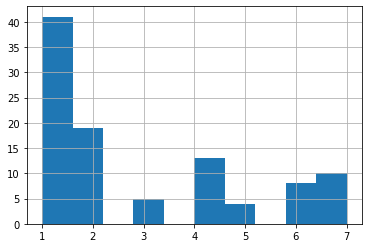

In [14]:
#Display the frequncy as a histogram

data['animal_type'].hist() #Visualiztion of the above (26) function

In [15]:
#data.describe(include = 'all')
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,0.43000,0.190000,0.580000,0.410000,0.240000,0.350000,0.55,0.610000,0.820000,0.79000,0.08000,0.170000,2.85000,0.740000,0.130000,0.43000,2.840000
std,0.49757,0.394277,0.496045,0.494311,0.429235,0.479372,0.50,0.490207,0.386123,0.40936,0.27266,0.377525,2.04186,0.440844,0.337998,0.49757,2.111632
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.00000,0.000000,2.00000,0.000000,0.000000,0.00000,1.000000
50%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,4.00000,1.000000,0.000000,0.00000,2.000000
75%,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,4.00000,1.000000,0.000000,1.00000,4.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00000,1.00000,1.000000,8.00000,1.000000,1.000000,1.00000,7.000000


##2.2 - Adding new data

In [16]:
#Add a column with animal type names

replace_dict = {					# Creating a dictionary with catagory names in respect to each anymal type number
				  1: 'mammal', 
				  2: 'bird', 
				  3: 'snake', 
				  4: 'fish', 
				  5: 'amphibian', 
				  6: 'insect', 
				  7: 'other invertebrates'}

data['animal_type_name'] = data['animal_type'].replace(replace_dict)  # adding a new column to the dataframe
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0.0,4,0,0,1,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0.0,4,1,0,1,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0.0,4,0,0,1,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0.0,4,1,0,1,1,mammal


In [17]:
data[data.values == 'fish'] # Observing data under individual animal types

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal_type,animal_type_name
2,bass,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4,fish
7,carp,0,0,1,0,0,1,0,1,1,0,0,1.0,0,1,1,0,4,fish
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4,fish
12,chub,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4,fish
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,1,4,fish
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1.0,0,1,0,0,4,fish
38,herring,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4,fish
60,pike,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,1,4,fish
61,piranha,0,0,1,0,0,1,1,1,1,0,0,1.0,0,1,0,0,4,fish
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1.0,0,1,0,0,4,fish


##2.3 - visualising data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e39c5eb90>,
      dtype=object)

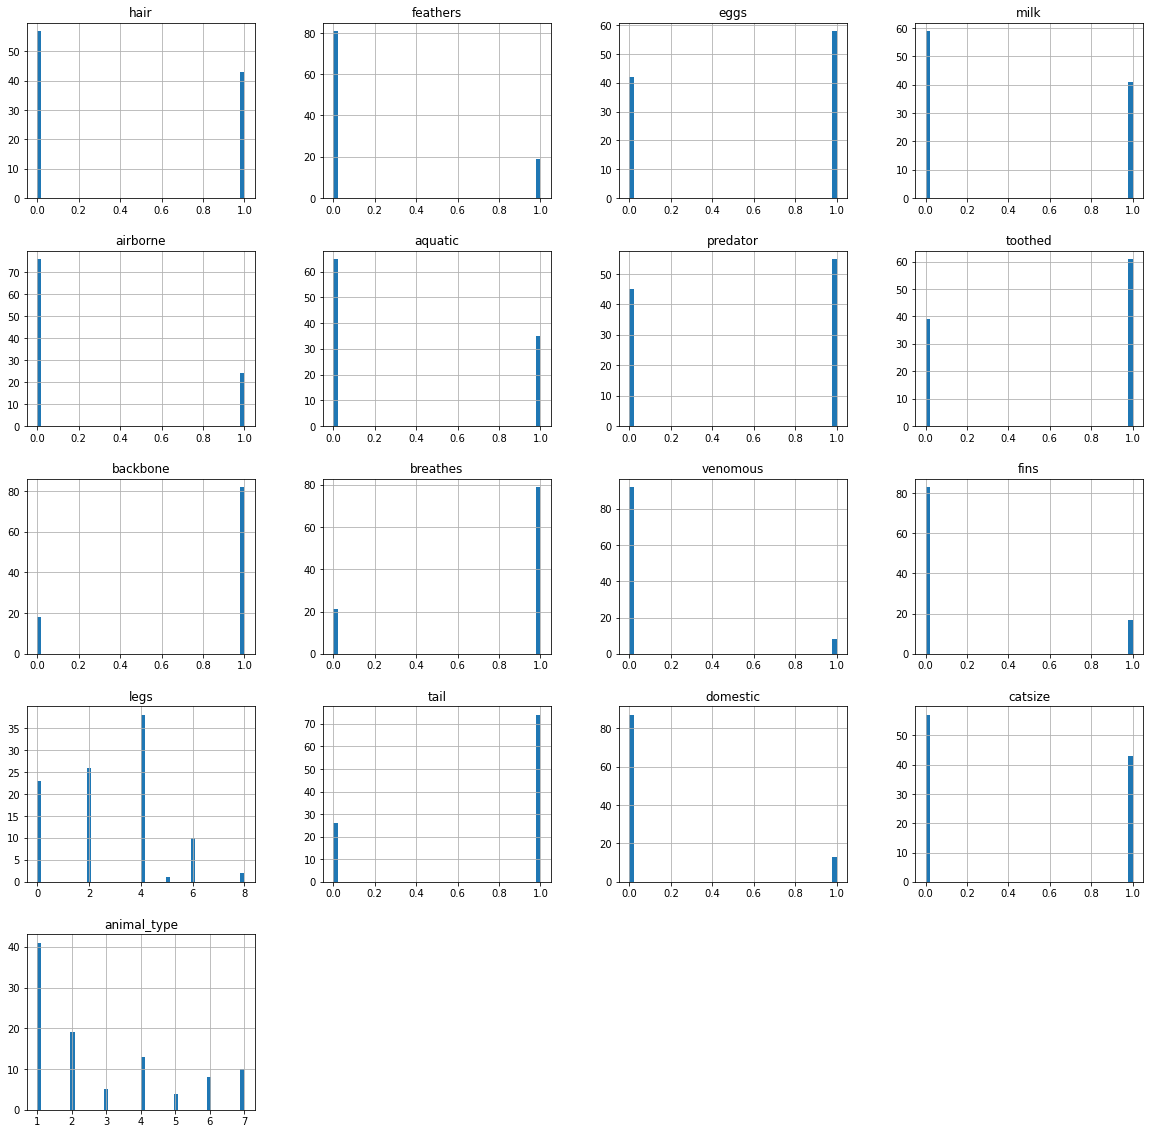

In [18]:
#Plotting Histograms to observe how data is distrubuted within each feature

data.hist(bins=50, figsize=(20, 20))

###For future reference 

https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

##2.5 - Checking for outliers

For future reading 

https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning

https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

https://shubh-tripathi.medium.com/all-about-outliers-in-machine-learning-2e26be9708f1

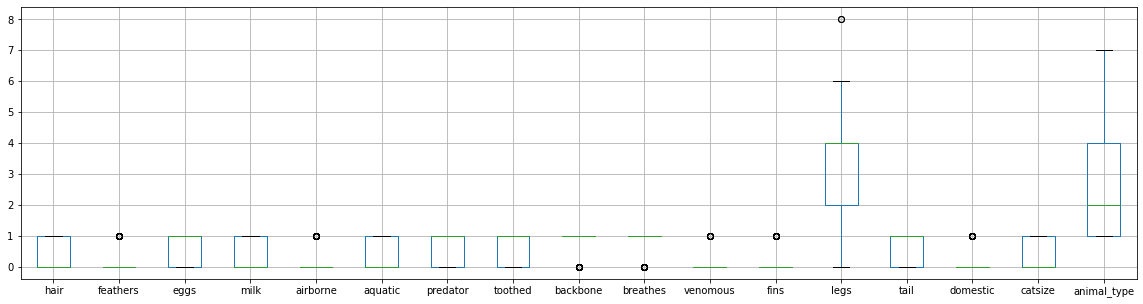

In [19]:
#Box plots

Column_names = ['hair',	'feathers', 'eggs',	'milk',	'airborne',	'aquatic','predator',	'toothed'	,'backbone',	
                  'breathes',	'venomous',	'fins',	'legs',	'tail',	'domestic', 'catsize', 'animal_type']

data.boxplot(Column_names, figsize=(20, 5))

##2.6 - Feature selection

For future reading

https://medium.com/analytics-vidhya/what-is-correlation-4fe0c6fbed47

https://medium.com/analytics-vidhya/feature-selection-techniques-2614b3b7efcd

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/



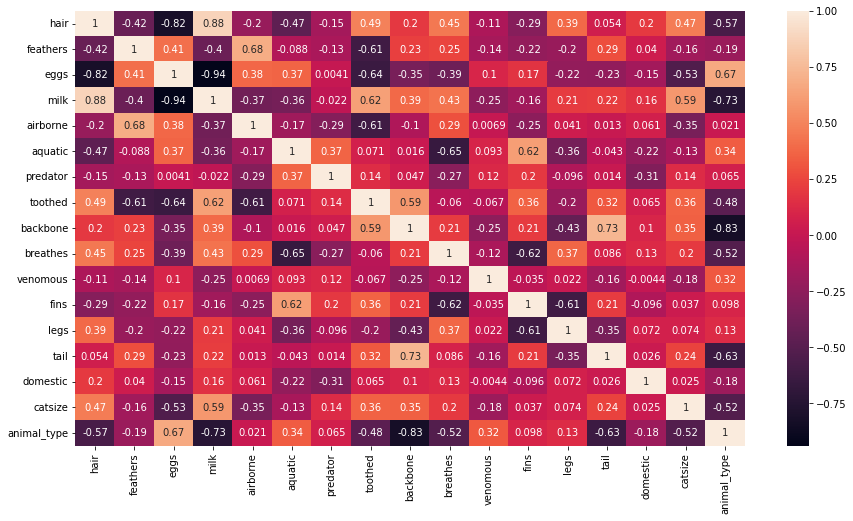

In [20]:
#Correlation matrics
correlation_matrix = data.corr()

plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
#correlation_matrix

FEATURES

In [21]:
X_variables = ['hair',	'feathers', 'eggs',	'milk',	'airborne',	'aquatic',	'toothed'	,'backbone',	
              'venomous',	'fins',	'legs',	'tail']
#data[X_variables].head()

In [22]:
y_variable = ['animal_type']
#data[y_variable].head()

In [23]:
print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'toothed', 'backbone', 'venomous', 'fins', 'legs', 'tail']
y_variable = ['animal_type']


##2.7 Train ~ Test split

In [24]:
X = data[X_variables].values
y = data[y_variable].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 70
Test sample size  = 30


In [26]:
y_test = y_test. flatten() 

##Selecting & Traning Models

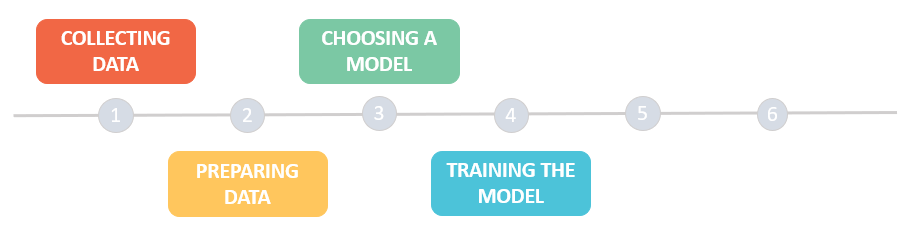

In [27]:
#Model training function

def model_train(model, model_name, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train) #fitting the train data into the model. This will train the model

    y_pred = model.predict(X_test) #Precting for the test sample 
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='weighted', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    #roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'],average="weighted", multi_class='ovr')

    

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  #'roc_auc':roc_auc,
                  'y act': y_test,
                  'y pred': y_pred
                  })

For future reading

https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

https://medium.com/fuzz/machine-learning-classification-models-3040f71e2529

hhttps://medium.com/analytics-vidhya/decision-boundary-for-classifiers-an-introduction-cc67c6d3da0e



In [28]:
#Selecting the best model

models = []
models.append(model_train(LogisticRegression(n_jobs=3, random_state = 0), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), 'KNeBR', X_train, y_train, X_test, y_test))
models.append(model_train(GaussianNB(), 'Gaus', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0), 'RF', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(criterion = 'gini', random_state = 0 ), 'DeciT-G', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(criterion = 'entropy', random_state = 0 ), 'DeciT-En', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

,model_name,model,accuracy,precision,f1_score,y act,y pred
0,lgr1,"LogisticRegression(n_jobs=3, random_state=0)",0.866667,0.838889,0.843175,"[1, 7, 2, 2, 1, 1, 3, 2, 4, 1, 4, 1, 4, 7, 1, ...","[1, 7, 2, 2, 1, 1, 4, 2, 4, 1, 4, 1, 4, 6, 1, ..."
1,KNeBR,KNeighborsClassifier(),0.766667,0.820635,0.749636,"[1, 7, 2, 2, 1, 1, 3, 2, 4, 1, 4, 1, 4, 7, 1, ...","[4, 5, 2, 2, 1, 1, 4, 2, 4, 1, 4, 1, 4, 6, 1, ..."
2,Gaus,GaussianNB(),1.000000,1.000000,1.000000,"[1, 7, 2, 2, 1, 1, 3, 2, 4, 1, 4, 1, 4, 7, 1, ...","[1, 7, 2, 2, 1, 1, 3, 2, 4, 1, 4, 1, 4, 7, 1, ..."
3,RF,"(DecisionTreeClassifier(criterion='entropy', m...",0.966667,0.973333,0.965185,"[1, 7, 2, 2, 1, 1, 3, 2, 4, 1, 4, 1, 4, 7, 1, ...","[1, 7, 2, 2, 1, 1, 4, 2, 4, 1, 4, 1, 4, 7, 1, ..."
4,DeciT-G,DecisionTreeClassifier(random_state=0),0.900000,0.875000,0.880000,"[1, 7, 2, 2, 1, 1, 3, 2, 4, 1, 4, 1, 4, 7, 1, ...","[1, 7, 2, 2, 1, 1, 5, 2, 4, 1, 4, 1, 4, 7, 1, ..."
5,DeciT-En,"DecisionTreeClassifier(criterion='entropy', ra...",0.900000,0.875000,0.880000,"[1, 7, 2, 2, 1, 1, 3, 2, 4, 1, 4, 1, 4, 7, 1, ...","[1, 7, 2, 2, 1, 1, 5, 2, 4, 1, 4, 1, 4, 7, 1, ..."


### **Best Model**

---


In [29]:
#Best Model

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Evaluating the model

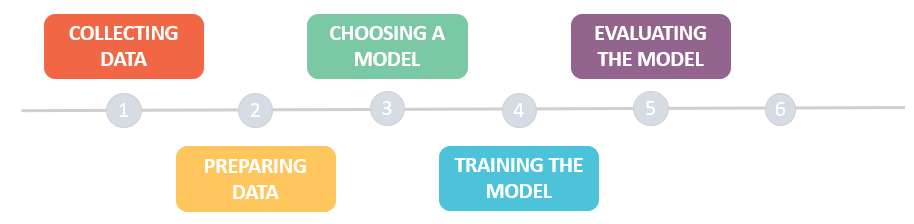

For future reading

https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

In [30]:
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[13  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


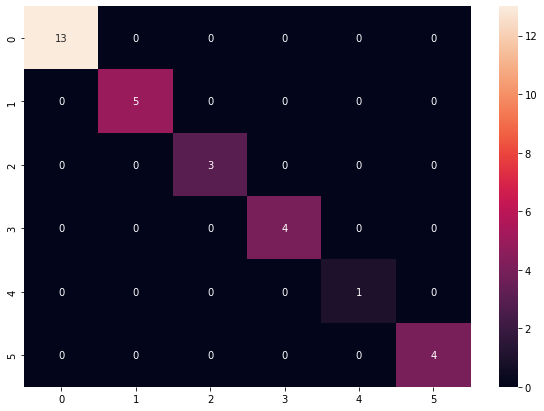

In [31]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Using a sample dataset to check the prediction probability 

In [32]:
sample_input = data[['hair',	'feathers', 'eggs',	'milk',	'airborne',	'aquatic',	'toothed'	,'backbone',	
              'venomous',	'fins',	'legs',	'tail']].sample(10)
sample_input

,hair,feathers,eggs,milk,airborne,aquatic,toothed,backbone,venomous,fins,legs,tail
23,0,1,1,0,1,0,0,1,0,0.0,2,1
78,0,1,1,0,1,1,0,1,0,0.0,2,1
80,0,0,1,0,0,0,1,1,0,0.0,0,1
5,1,0,0,1,0,0,1,1,0,0.0,4,1
19,0,0,0,1,0,1,1,1,0,1.0,0,1
48,1,0,0,1,0,1,1,1,0,0.0,4,1
43,0,1,1,0,1,0,0,1,0,0.0,2,1
24,0,0,1,0,0,0,0,0,0,0.0,6,0
84,1,0,0,1,0,0,1,1,0,0.0,2,1
3,1,0,0,1,0,0,1,1,0,0.0,4,0


In [33]:
#This returns the probabilty of the sample datapoint falling under each catagory. 
#Probability values runs between 1 & 0
model.predict_proba(sample_input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9

If decision tree model is used, below function allows to visualize the model tree

In [34]:
# class_names = [str(c) for c in model.classes_]

# pfig = plt.figure(figsize=(20,20))
# tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True)
# plt.show()